# Image

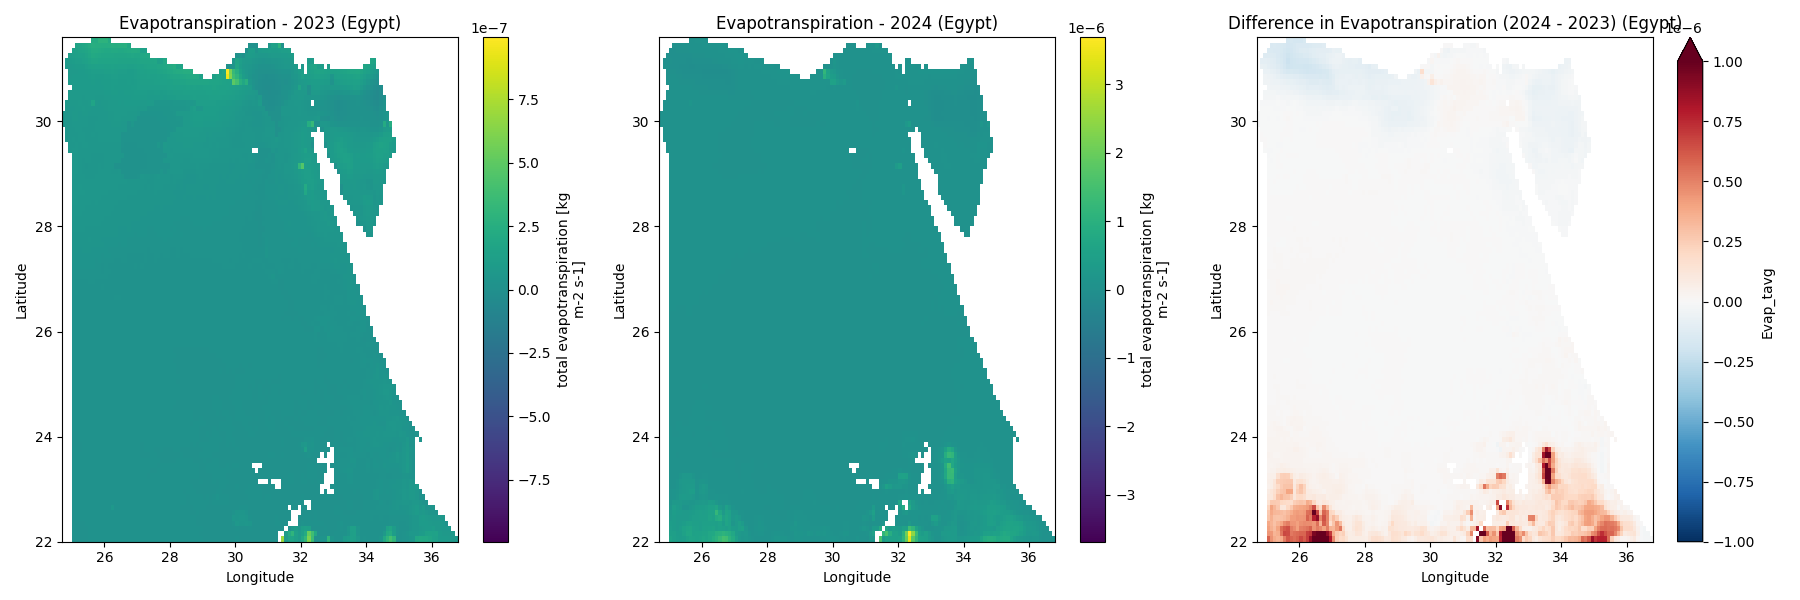

Image Description: 이 이미지는 나사의 2024년과 2023년의 이집트 통계값으로, ET(증발산량) 지수의 평균값을 보여주고 있습니다. ET는 지면에서 증발되고 식물에서 증발하는 물의 양을 나타내는 변수로, 물 순환과 에너지 흐름에서 중요한 역할을 합니다. 

이 데이터를 바탕으로 이집트의 농업을 분석하면 다음과 같은 결론을 내릴 수 있습니다:

1. **물 자원 관리**: 증발산량이 높을 경우, 농업에 필요한 물이 더 많이 존재할 수 있지만, 물 관리에 주의가 필요합니다. 증발량이 지나치게 높으면 농작물에 필요한 수분이 불충분할 수 있습니다.

2. **농업 생산성 향상**: ET 데이터는 농작물의 성장 및 수확 시기를 조정하는 데 유용한 정보를 제공합니다. 특히 지속적인 모니터링을 통해 어떤 시기에 물이 더 필요한지를 예측할 수 있습니다.

3. **기후 변화 대응**: 기후 변화는 증발산량에 큰 영향을 미칩니다. 변화하는 ET 지수는 기후 변화에 따른 농업 패턴의 변화를 보여주며, 이를 통해 장기적인 농업 전략을 수립할 수 있습니다.

4. **지속 가능한 농업 실천**: ET


In [20]:
import os
import base64
import requests
from dotenv import load_dotenv
from PIL import Image

# Load environment variables from .env file
load_dotenv()

# Get OpenAI API key from .env
openai_api_key = os.getenv("OPENAI_API_KEY")

# Function to read and display image
def read_image(image_path):
    image = Image.open(image_path)
    image.show()  # This will display the image
    return image

# Function to encode the image in base64
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')

# Function to get image description from OpenAI API
def image_describe_by_prompt(prompt, image_path):
    base64_image = encode_image(image_path)
    
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {openai_api_key}"
    }

    payload = {
        "model": "gpt-4o",
        "messages": [
            {
                "role": "user",
                "content": f"{prompt}"
            },
            {
                "role": "user",
                "content": f"data:image/jpeg;base64,{base64_image}"
            }
        ],
        "max_tokens": 300
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)
    
    # Handle response and check for errors
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error: {response.status_code}, {response.text}"

# Main function
def main():
    image_path = "./data/img/egypt_evap_combined_emphasized.png"
    prompt = "이 이미지는 나사의 2024년과 2023년의 egpyt 통계값으로 evap지수 (즉, Evapotranspiration (ET) is the sum of evaporation from the land surface and transpiration in vegetation.값인 ET의 평균값으로,지면에서 증발되고 식물에서 증발하는 물의 양을 나타내는 변수로, 물 순환과 에너지 흐름에서 중요한 역할을 합니다. 이 데이터셋에서의 증발산량은 주어진 시간 동안 평균된 값입니다. 해당 이미지를 바탕으로 이집트의 농업에 대해 요약하고 설명해주세요. 한국어로 설명해야 합니다. "

    # Display the image
    read_image(image_path)

    # Get image description from OpenAI API
    image_description = image_describe_by_prompt(prompt, image_path)
    
    # Print the image description
    print("Image Description:", image_description)

if __name__ == "__main__":
    main()


In [21]:
# import cv2
# 
# def downsample_image(image_path, output_path, scale_percent):
#     # 이미지를 읽어옵니다
#     image = cv2.imread(image_path)
# 
#     # 이미지의 원본 크기를 얻습니다
#     original_height, original_width = image.shape[:2]
# 
#     # 크기 비율에 맞게 새로운 크기를 계산합니다
#     new_width = int(original_width * scale_percent / 100)
#     new_height = int(original_height * scale_percent / 100)
# 
#     # 이미지를 리사이즈(다운샘플링)합니다
#     resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_AREA)
# 
#     # 이미지를 저장합니다
#     cv2.imwrite(output_path, resized_image)
#     return output_path
# 
# # 예제 사용법:
# # image_path = './data/img/combined_evap_plot.png'
# # output_path = './data/img/downsampled_combined_evap_plot.png'
# 
# # 50%로 다운샘플링
# downsample_image(image_path, output_path, scale_percent=50)

# Point

In [25]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# File path to the uploaded NetCDF file
file_path = './data/Vegetation_ET/FLDAS_NOAH01_C_GL_M.A202408.001.nc'

# Open the NetCDF file using xarray
ds = xr.open_dataset(file_path)

# Evap_tavg 변수 추출
evap_data = ds['Evap_tavg']

<xarray.DataArray 'Evap_tavg' (time: 1, Y: 1500, X: 3600)>
[5400000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2024-08-01
  * X        (X) float64 -179.9 -179.8 -179.8 -179.6 ... 179.7 179.8 179.9 180.0
  * Y        (Y) float64 -59.95 -59.85 -59.75 -59.65 ... 89.65 89.75 89.85 89.95
Attributes:
    standard_name:  total_evapotranspiration
    long_name:      total evapotranspiration
    units:          kg m-2 s-1
    vmin:           -1000000000000000.0
    vmax:           1000000000000000.0
    cell_methods:   time:mean

In [29]:
# import xarray as xr
# import matplotlib.pyplot as plt
# import matplotlib.pyplot as plt
#
# # File path to the uploaded NetCDF file
# file_path = './data/Vegetation_ET/FLDAS_NOAH01_C_GL_M.A202408.001.nc'
#
# # Open the NetCDF file using xarray
# ds = xr.open_dataset(file_path)
#
# # Evap_tavg 변수 추출
# evap_data = ds['Evap_tavg']
#
# print(evap_data)
# print(evap_data['X'])
#
# # 특정 위도(Y)와 경도(X) 좌표 선택 (예시: 경도 120, 위도 -30)
# lon = 120  # 경도
# lat = -30  # 위도
#
# # 가장 가까운 좌표에 해당하는 값을 추출
# evap_value = evap_data.sel(X=lon, Y=lat, method='nearest').values
#
# # 출력
# print(f'경도 {lon}, 위도 {lat}에서의 증발산 값: {evap_value}')


import os
import base64
import requests
import xarray as xr
from dotenv import load_dotenv

# Load environment variables from .env file
load_dotenv()

# Get OpenAI API key from .env
openai_api_key = os.getenv("OPENAI_API_KEY")


# Function to encode the image in base64 (for future use if you want to send images)
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode('utf-8')


# Function to extract Evap_tavg value based on lon and lat
def extract_evap_data(file_path, lon, lat):
    # Open the NetCDF file using xarray
    ds = xr.open_dataset(file_path)

    # Evap_tavg 변수 추출
    evap_data = ds['Evap_tavg']

    # 가장 가까운 좌표에 해당하는 값을 추출
    evap_value = evap_data.sel(X=lon, Y=lat, method='nearest').values

    return evap_value


# Function to query OpenAI API for the extracted data
def query_openai(prompt, evap_value, lon, lat):
    headers = {
        "Content-Type": "application/json",
        "Authorization": f"Bearer {openai_api_key}"
    }

    # Create a question for the AI including the extracted Evap_tavg value
    user_question = f"{prompt} 위도 {lat}, 경도 {lon}에서의 증발산 값은 {evap_value}입니다. 이 수치를 바탕으로 이집트 농업에 대한 영향을 분석해주세요."

    payload = {
        "model": "gpt-4",
        "messages": [
            {
                "role": "user",
                "content": user_question
            }
        ],
        "max_tokens": 500
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=payload)

    # Handle response and check for errors
    if response.status_code == 200:
        return response.json()["choices"][0]["message"]["content"]
    else:
        return f"Error: {response.status_code}, {response.text}"


# Main function
def main():
    # Define file path and the coordinates (lon, lat) you want to query
    file_path = './data/Vegetation_ET/FLDAS_NOAH01_C_GL_M.A202408.001.nc'
    lon = 31.233  # 카이로의 경도
    lat = 30.033  # 카이로의 위도

    # Extract Evap_tavg data for the given coordinates
    evap_value = extract_evap_data(file_path, lon, lat)

    # Define a prompt to ask OpenAI
    prompt = "이 값은 Evapotranspiration (ET) 수치로, 해당 값은 물 순환과 에너지 흐름에서 중요한 역할을 합니다. "

    # Get description from OpenAI based on the extracted value
    response = query_openai(prompt, evap_value, lon, lat)

    # Print the response from OpenAI
    print("AI Response:", response)


if __name__ == "__main__":
    main()

AI Response: 이집트의 농업은 주로 나일 강의 물을 이용하며, 이 에너지 흐름과 물 순환에 매우 의존적입니다. 이때 증발산 혹은 Evapotranspiration (ET)은 중요한 변수가 됩니다. ET는 물이 토양에서 증발되거나 식물이 흡수한 물이 일정한 조건에서 증발하는 양을 나타냅니다. 고로, 이 수치가 높으면 높을수록 물의 손실이 많으며 물 대기 방출과 환경 에너지 교환에 영향을 미칠 수 있습니다.

제시된 값 [1.25786855e-11]은 매우 작은 숫자로, 실질적으로 물이 거의 증발하지 않는다는 의미입니다. 이는 이집트의 농업에 긍정적인 충격을 주고 있을 가능성이 높습니다. 왜냐하면 농작물은 수분을 필요로 하기 때문에, 물이 증발되지 않도록 관리하는 것이 농작물 성장에 중요하기 때문입니다.

그러나 반대로 이렇게 증발산이 낮은 건 분명히 그 위치에서 강수량이 매우 적거나, 대기 조건이 수증기의 증발을 억제하거나 했을 가능성을 시사합니다. 이로 인해 식물이 건강하게 성장하기 위해 필요한 이상적인 환경 조건을 충족시키기가 어렵습니다.

물론, 자세한
